# Decision tree for classification
> A Summary of lecture "Machine Learning with Tree-Based Models in Python
", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning]
- image: images/decision-boundary.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


## Decision tree for classification
- Classification-tree
    - Sequence of if-else questions about individual features.
    - **Objective**: infer class labels
    - Able to caputre non-linear relationships between features and labels
    - Don't require feature scaling(e.g. Standardization)
- Decision Regions
    - Decision region: region in the feature space where all instances are assigned to one class label
    - Decision Boundary: surface separating different decision regions
![decision region](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/decision_boundary.png?raw=1)

### Train your first classification tree
In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (```radius_mean```) and its mean number of concave points (```concave points_mean```).

### Preprocess

In [4]:
wbc = pd.read_csv('data.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Overview of data**

In [9]:
overview =wbc.apply(lambda col: col.unique())
overview

id                         [842302, 842517, 84300903, 84348301, 84358402,...
diagnosis                                                             [M, B]
radius_mean                [17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....
texture_mean               [10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9...
perimeter_mean             [122.8, 132.9, 130.0, 77.58, 135.1, 82.57, 119...
area_mean                  [1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,...
smoothness_mean            [0.1184, 0.08474, 0.1096, 0.1425, 0.1003, 0.12...
compactness_mean           [0.2776, 0.07864, 0.1599, 0.2839, 0.1328, 0.17...
concavity_mean             [0.3001, 0.0869, 0.1974, 0.2414, 0.198, 0.1578...
concave points_mean        [0.1471, 0.07017, 0.1279, 0.1052, 0.1043, 0.08...
symmetry_mean              [0.2419, 0.1812, 0.2069, 0.2597, 0.1809, 0.208...
fractal_dimension_mean     [0.07871, 0.05667, 0.05999, 0.09744, 0.05883, ...
radius_se                  [1.095, 0.5435, 0.7456, 0.4956, 0.7572, 0.3345...

In [50]:
x=wbc['area_se']
li=wbc.columns

In [68]:
li=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean']

# **Fitting guassian normal distribution of area data**

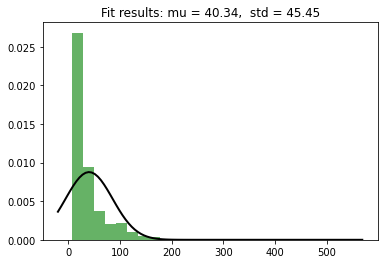

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.

# Fit a normal distribution to the data:
mu, std = norm.fit(x)

# Plot the histogram.
plt.hist(x, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

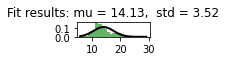

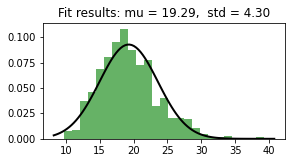

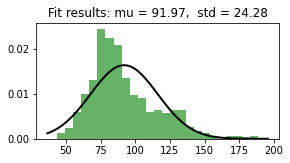

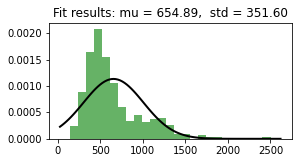

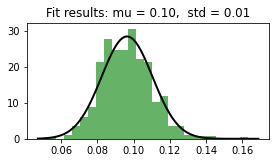

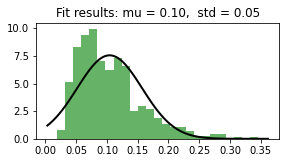

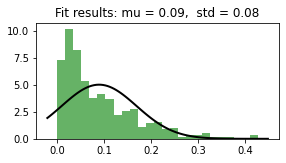

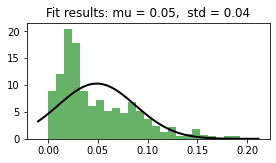

<Figure size 1440x1440 with 0 Axes>

In [86]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from scipy.stats import norm



subplots_adjust(hspace=1)
number_of_subplots=len(li)

for i,v in enumerate(range(number_of_subplots)):
    v = v+1
    ax1 = subplot(number_of_subplots,4,v)
    x=wbc[li[i]]
    mu, std = norm.fit(x)

    # Plot the histogram.
    ax1.hist(x, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    ax1.plot(x, p, 'k', linewidth=2)
    plt.figure(figsize=(20, 20))
ax1.figure.savefig('test2png.png', dpi=800)
plt.show()




In [87]:
from google.colab import files
files.download('test2png.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **application of the model on a set of generated numbers**

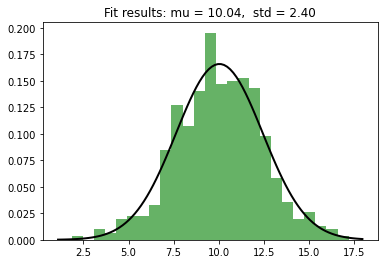

In [37]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [5]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


# **Slight difference between support vector machine and decisiontreeclassifer**

In [14]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


### Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [15]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


### Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

#### Helper function

In [17]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


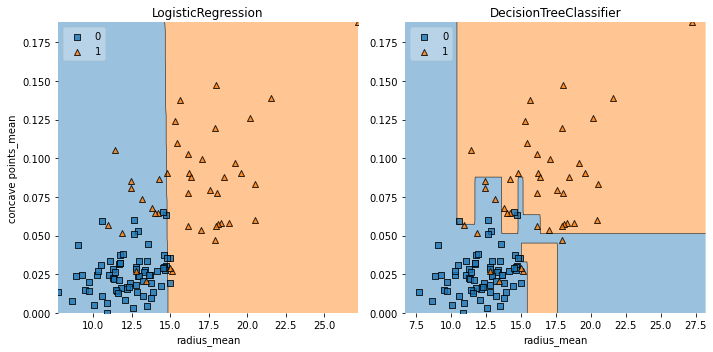

In [18]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

## Classification tree Learning
- Building Blocks of a Decision-Tree
    - Decision-Tree: data structure consisting of a hierarchy of nodes
    - Node: question or prediction
    - Three kinds of nodes
        - **Root**: no parent node, question giving rise to two children nodes.
        - **Internal node**: one parent node, question giving rise to two children nodes.
        - **Leaf**: one parent node, no children nodes --> prediction.
- Information Gain (IG)
![information gain](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/ig.png?raw=1)
$$ IG(\underbrace{f}_{\text{feature}}, \underbrace{sp}_{\text{split-point}} ) = I(\text{parent}) - \big( \frac{N_{\text{left}}}{N}I(\text{left}) + \frac{N_{\text{right}}}{N}I(\text{right})  \big) $$
    - Criteria to measure the impurity of a note $I(\text{node})$:
        - gini index
        - entropy
        - etc...
- Classification-Tree Learning
    - Nodes are grown recursively.
    - At each node, split the data based on:
        - feature $f$ and split-point $sp$ to maximize $IG(\text{node})$.
        - If $IG(\text{node}) = 0$, declare the node a leaf

### Using entropy as a criterion
In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

### Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named ```dt_gini```. The tree ```dt_gini``` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword ```'gini'```.

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using gini:  0.8859649122807017


## Decision tree for regression
- Information Criterion for Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$

### Train your first regression tree
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) using all the six available features.



#### Preprocess

In [ ]:
mpg = pd.read_csv('auto-mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg = pd.get_dummies(mpg)

In [ ]:
mpg.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### Evaluate the regression tree
In this exercise, you will evaluate the test set performance of ```dt``` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).



In [ ]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 3.68


### Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of ```dt``` to that achieved by a linear regression model. We have already instantiated a linear regression model ```lr``` and trained it on the same dataset as ```dt```.



#### Preprocess

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 4.07
Regression Tree test set RMSE: 3.68
